###### Feature Information

PassengerID: Unique ID number

Survived: 0 = No, 1 = Yes

Pclass: Ticket class (1, 2, or 3)

Name: Passenger name

Sex: Male or Female

Age: Age in years

SibSp: # of siblings/spouses aboard the Titanic

Parch: # of parents/children aboard the Titanic

Ticket: Ticket #

Fare: Passenger fare

Cabin: Cabin number

Embarked: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

# Imports

In [523]:
import numpy as np
import pandas as pd
import pandas_profiling as pp
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import KFold, GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score

# Obtain

Load train & test data as dataframes from csv files

In [524]:
# Import training/testing data using pandas

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
test_index = test.PassengerId

In [525]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [526]:
test.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

# Scrub

I first combine both test and train, excluding the 'Survived' feature,
so that data scrubbing/exploration can be performed on the entire dataset

In [527]:
train_features = train.drop('Survived', axis=1)
df = pd.concat([train_features, test], axis=0, ignore_index=True)

In [528]:
df.head()

PassengerId  Pclass                                               Name  \
0            1       3                            Braund, Mr. Owen Harris   
1            2       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2            3       3                             Heikkinen, Miss. Laina   
3            4       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4            5       3                           Allen, Mr. William Henry   

      Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked  
0    male  22.0      1      0         A/5 21171   7.2500   NaN        S  
1  female  38.0      1      0          PC 17599  71.2833   C85        C  
2  female  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S  
3  female  35.0      1      0            113803  53.1000  C123        S  
4    male  35.0      0      0            373450   8.0500   NaN        S

In [529]:
df[df.Fare == 0]

PassengerId  Pclass                                   Name   Sex   Age  \
179           180       3                    Leonard, Mr. Lionel  male  36.0   
263           264       1                  Harrison, Mr. William  male  40.0   
271           272       3           Tornquist, Mr. William Henry  male  25.0   
277           278       2            Parkes, Mr. Francis "Frank"  male   NaN   
302           303       3        Johnson, Mr. William Cahoone Jr  male  19.0   
413           414       2         Cunningham, Mr. Alfred Fleming  male   NaN   
466           467       2                  Campbell, Mr. William  male   NaN   
481           482       2       Frost, Mr. Anthony Wood "Archie"  male   NaN   
597           598       3                    Johnson, Mr. Alfred  male  49.0   
633           634       1          Parr, Mr. William Henry Marsh  male   NaN   
674           675       2             Watson, Mr. Ennis Hastings  male   NaN   
732           733       2                   Knight, Mr. Robert J  male   NaN   
806           807       1                 Andrews, Mr. Thomas Jr  male  39.0   
815           816       1                       Fry, Mr. Richard  male   NaN   
822           823       1        Reuchlin, Jonkheer. John George  male  38.0   
1157         1158       1  Chisholm, Mr. Roderick Robert Crispin  male   NaN   
1263         1264       1                Ismay, Mr. Joseph Bruce  male  49.0   

      SibSp  Parch  Ticket  Fare        Cabin Embarked  
179       0      0    LINE   0.0          NaN        S  
263       0      0  112059   0.0          B94        S  
271       0      0    LINE   0.0          NaN        S  
277       0      0  239853   0.0          NaN        S  
302       0      0    LINE   0.0          NaN        S  
413       0      0  239853   0.0          NaN        S  
466       0      0  239853   0.0          NaN        S  
481       0      0  239854   0.0          NaN        S  
597       0      0    LINE   0.0          NaN        S  
633       0      0  112052   0.0          NaN        S  
674       0      0  239856   0.0          NaN        S  
732       0      0  239855   0.0          NaN        S  
806       0      0  112050   0.0          A36        S  
815       0      0  112058   0.0         B102        S  
822       0      0   19972   0.0          NaN        S  
1157      0      0  112051   0.0          NaN        S  
1263      0      0  112058   0.0  B52 B54 B56        S

In [438]:
df.iloc[1043]

PassengerId                  1044
Pclass                          3
Name           Storey, Mr. Thomas
Sex                          male
Age                          60.5
SibSp                           0
Parch                           0
Ticket                       3701
Fare                          NaN
Cabin                         NaN
Embarked                        S
Name: 1043, dtype: object

###### There are several immediate issues with the data:

1) Missing (null) values in the 'Age', 'Cabin', and 'Embarked' features

2) Non-numeric data is present in the 'Name', 'Sex', 'Ticket', 'Cabin', and 'Embarked' features.

The points should be addressed before further meaningful data analysis is performed.

###### 1) Handing 'Age' missing values

There are so many missing age values, that I don't want to simply fill these with the median or mean. So, I will impute age values using median values when grouping by a couple of other categories: Pclass and sex. First, let's find these median values:

In [439]:
grouped_df = df.groupby(['Sex', 'Pclass'])
grouped_median_df = grouped_df.median()
grouped_median_df = grouped_median_df.reset_index()[['Sex', 'Pclass', 'Age']]

In [440]:
grouped_median_df

Sex  Pclass   Age
0  female       1  36.0
1  female       2  28.0
2  female       3  22.0
3    male       1  42.0
4    male       2  29.5
5    male       3  25.0

In [441]:
df.Age.fillna(value=0, inplace=True)

In [442]:
# Function to impute these median age values

def impute_ages(df):
    
    for i in range(len(df)):
        if df.iloc[i]['Age'] == 0:
            if df.iloc[i]['Sex'] == 'female' and df.iloc[i]['Pclass'] == 1:
                df.set_value(i, 'Age', grouped_median_df.iloc[0]['Age'])
            elif df.iloc[i]['Sex'] == 'female' and df.iloc[i]['Pclass'] == 2:
                df.set_value(i, 'Age', grouped_median_df.iloc[1]['Age'])
            elif df.iloc[i]['Sex'] == 'female' and df.iloc[i]['Pclass'] == 3:
                df.set_value(i, 'Age', grouped_median_df.iloc[2]['Age'])
            elif df.iloc[i]['Sex'] == 'male' and df.iloc[i]['Pclass'] == 1:
                df.set_value(i, 'Age', grouped_median_df.iloc[3]['Age'])
            elif df.iloc[i]['Sex'] == 'male' and df.iloc[i]['Pclass'] == 2:
                df.set_value(i, 'Age', grouped_median_df.iloc[4]['Age'])
            elif df.iloc[i]['Sex'] == 'male' and df.iloc[i]['Pclass'] == 3:
                df.set_value(i, 'Age', grouped_median_df.iloc[5]['Age'])

In [443]:
impute_ages(df)  

In [444]:
df.Age.isna().sum()

0

In [445]:
df.Age.value_counts()

25.00    178
22.00    107
24.00     47
42.00     46
36.00     42
        ... 
74.00      1
24.50      1
80.00      1
23.50      1
0.67       1
Name: Age, Length: 99, dtype: int64

###### 2) Handle 'Cabin' missing values

Since most of the data is missing, it is best to drop this feature entirely

In [446]:
# Drop cabin feature

df.drop('Cabin', axis=1, inplace=True)

In [447]:
# Check to make sure 'Cabin' removed

df.head()

PassengerId  Pclass                                               Name  \
0            1       3                            Braund, Mr. Owen Harris   
1            2       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2            3       3                             Heikkinen, Miss. Laina   
3            4       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4            5       3                           Allen, Mr. William Henry   

      Sex   Age  SibSp  Parch            Ticket     Fare Embarked  
0    male  22.0      1      0         A/5 21171   7.2500        S  
1  female  38.0      1      0          PC 17599  71.2833        C  
2  female  26.0      0      0  STON/O2. 3101282   7.9250        S  
3  female  35.0      1      0            113803  53.1000        S  
4    male  35.0      0      0            373450   8.0500        S

###### 3) Handle 'Embarked' missing values

In [448]:
# Let's see the distribution of values for 'Embarked'

df.Embarked.value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [449]:
# Since most people embarked at 'S', we will fill the two null values with 'S'

df.Embarked.fillna('S', inplace=True)

df.Embarked.value_counts()

S    916
C    270
Q    123
Name: Embarked, dtype: int64

Since 'Embarked' is stored categorically, want to convert this to dummy variables

In [450]:
dummies = pd.get_dummies(df.Embarked, prefix='Emb')

In [451]:
df = pd.concat([df, dummies], axis=1)

In [452]:
df.drop('Embarked', axis=1, inplace=True)

In [453]:
df.head()

PassengerId  Pclass                                               Name  \
0            1       3                            Braund, Mr. Owen Harris   
1            2       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2            3       3                             Heikkinen, Miss. Laina   
3            4       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4            5       3                           Allen, Mr. William Henry   

      Sex   Age  SibSp  Parch            Ticket     Fare  Emb_C  Emb_Q  Emb_S  
0    male  22.0      1      0         A/5 21171   7.2500      0      0      1  
1  female  38.0      1      0          PC 17599  71.2833      1      0      0  
2  female  26.0      0      0  STON/O2. 3101282   7.9250      0      0      1  
3  female  35.0      1      0            113803  53.1000      0      0      1  
4    male  35.0      0      0            373450   8.0500      0      0      1

###### 4) Handling 'Sex' dtype

Since 'Embarked' is stored categorically, want to convert this to dummy variables

In [454]:
s_dummies = pd.get_dummies(df.Sex, prefix='sex', drop_first=True)
df = pd.concat([df, s_dummies], axis=1)
df.drop('Sex', axis=1, inplace=True)

In [455]:
df.head()

PassengerId  Pclass                                               Name  \
0            1       3                            Braund, Mr. Owen Harris   
1            2       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2            3       3                             Heikkinen, Miss. Laina   
3            4       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4            5       3                           Allen, Mr. William Henry   

    Age  SibSp  Parch            Ticket     Fare  Emb_C  Emb_Q  Emb_S  \
0  22.0      1      0         A/5 21171   7.2500      0      0      1   
1  38.0      1      0          PC 17599  71.2833      1      0      0   
2  26.0      0      0  STON/O2. 3101282   7.9250      0      0      1   
3  35.0      1      0            113803  53.1000      0      0      1   
4  35.0      0      0            373450   8.0500      0      0      1   

   sex_male  
0         1  
1         0  
2         0  
3         0  
4         1

###### 5) Handling 'Name' and 'Ticket' features

Since I don't see any real way to extract meaningful information from these, I will drop these from my training data.

In [456]:
df.drop(['Name', 'Ticket'], axis=1, inplace=True)

In [457]:
df.head()

PassengerId  Pclass   Age  SibSp  Parch     Fare  Emb_C  Emb_Q  Emb_S  \
0            1       3  22.0      1      0   7.2500      0      0      1   
1            2       1  38.0      1      0  71.2833      1      0      0   
2            3       3  26.0      0      0   7.9250      0      0      1   
3            4       1  35.0      1      0  53.1000      0      0      1   
4            5       3  35.0      0      0   8.0500      0      0      1   

   sex_male  
0         1  
1         0  
2         0  
3         0  
4         1

###### 6) Handling missing fare value

In [458]:
# Check other attributes of this passenger

df[df.isnull().any(axis=1)]

PassengerId  Pclass   Age  SibSp  Parch  Fare  Emb_C  Emb_Q  Emb_S  \
1043         1044       3  60.5      0      0   NaN      0      0      1   

      sex_male  
1043         1

In [459]:
# Fill this null value with the median Fare for a 3rd class passenger

grouped_df = df.groupby(['Pclass'])
grouped_median_df = grouped_df.median()
grouped_median_df = grouped_median_df.reset_index()[['Pclass', 'Fare']]

In [460]:
grouped_median_df

Pclass     Fare
0       1  60.0000
1       2  15.0458
2       3   8.0500

In [461]:
df.Fare.fillna(8.05, inplace=True)

###### 7) One-hot encoding of Pclass

In [462]:
c_dummies = pd.get_dummies(df.Pclass, prefix='class', drop_first=False)
df = pd.concat([df, c_dummies], axis=1)
df.drop('Pclass', axis=1, inplace=True)

In [463]:
df.head()

PassengerId   Age  SibSp  Parch     Fare  Emb_C  Emb_Q  Emb_S  sex_male  \
0            1  22.0      1      0   7.2500      0      0      1         1   
1            2  38.0      1      0  71.2833      1      0      0         0   
2            3  26.0      0      0   7.9250      0      0      1         0   
3            4  35.0      1      0  53.1000      0      0      1         0   
4            5  35.0      0      0   8.0500      0      0      1         1   

   class_1  class_2  class_3  
0        0        0        1  
1        1        0        0  
2        0        0        1  
3        1        0        0  
4        0        0        1

###### Final check of first pass at scrubbing

In [464]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
PassengerId    1309 non-null int64
Age            1309 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Fare           1309 non-null float64
Emb_C          1309 non-null uint8
Emb_Q          1309 non-null uint8
Emb_S          1309 non-null uint8
sex_male       1309 non-null uint8
class_1        1309 non-null uint8
class_2        1309 non-null uint8
class_3        1309 non-null uint8
dtypes: float64(2), int64(3), uint8(7)
memory usage: 60.2 KB


# Explore

Taking another look at each variable, so see if anything needs bo be adjusted before beginning modeling.

In [465]:
# Run pandas profiling report on our scrubbed training dataset

pp.ProfileReport(df)

## Feature Engineering

I want to see if being alone or with family has any real impact on predicting whether someone survived. I will create a new column called 'Alone', which will be dependent on whether the passenger had any non-zero result in the 'SibSp' or the 'Parch' categories.

In [466]:
df['Alone'] = np.where((df['SibSp'] + df['Parch']) == 0, 1, 0)

In [467]:
df.head()

PassengerId   Age  SibSp  Parch     Fare  Emb_C  Emb_Q  Emb_S  sex_male  \
0            1  22.0      1      0   7.2500      0      0      1         1   
1            2  38.0      1      0  71.2833      1      0      0         0   
2            3  26.0      0      0   7.9250      0      0      1         0   
3            4  35.0      1      0  53.1000      0      0      1         0   
4            5  35.0      0      0   8.0500      0      0      1         1   

   class_1  class_2  class_3  Alone  
0        0        0        1      0  
1        1        0        0      0  
2        0        0        1      1  
3        1        0        0      0  
4        0        0        1      1

# Model

First, let's assign our features and target to X and y

In [468]:
X = df[:len(train)]
y = train.Survived

test = df[len(train):]

Next, let's define a function to perform KFold cross validation for any classifier we want to use, and returns the accuracy score for each split as well as the mean cross validation accuracy.

In [469]:
def cross_val_acc(X, y, classifier, n_splits, random_state=None):
    
    from sklearn.model_selection import KFold
    from sklearn.metrics import accuracy_score
    
    cv = KFold(n_splits=n_splits, random_state=random_state, shuffle=True)
    
    scores = []
    for train_index, test_index in cv.split(X):
        classifier.fit(X.iloc[train_index], y.iloc[train_index])
        y_pred = classifier.predict(X.iloc[test_index])
        y_true = y.iloc[test_index]
        scores.append(accuracy_score(y_true, y_pred))

    print(f"Accuracy Scores: {scores}")
    print(f"Mean Cross Val. Acc.: {round(np.mean(scores), 2)}")

## Zero Rule (ZeroR) Classifier

This is a great baseline classifier for a binary classification problem like this. The ZeroR classifier simply predicts the majority class in your dataset (i.e., mode).

In [470]:
zero_r_clf = round(len(train.loc[train.Survived == 0]) / len(train), 2)

In [471]:
print(f"ZeroR (Baseline) Classifier Accuracy is: {zero_r_clf}")

ZeroR (Baseline) Classifier Accuracy is: 0.62


So, the baseline ZeroR classifier (which only predicts the majority class) will be right about 62% of the time (i.e., if we predict that everyone died, we will be 62% accurate). This is a good starting point for more sophisticated classifiers.

## Gender Classifier

In [472]:
gender_clf = []
for i in X.sex_male:
    if i == 1:
        gender_clf.append(0)
    else:
        gender_clf.append(1)
        
gender_clf_score = round(accuracy_score(y, gender_clf), 2)

In [473]:
print(f"Gender Classifier Accuracy is: {gender_clf_score}")

Gender Classifier Accuracy is: 0.79


By simply predicting that all males die, we achieve 79 % accuracy on the training set.

## Random Forest Classifier

In [474]:
# Instantiate a random forest classifier

rf_clf = RandomForestClassifier(random_state=1)

In [475]:
# Perform 5-fold cross validation to get accuracy

cross_val_acc(X, y, rf_clf, n_splits=5, random_state=1)

Accuracy Scores: [0.7932960893854749, 0.7752808988764045, 0.8146067415730337, 0.848314606741573, 0.8202247191011236]
Mean Cross Val. Acc.: 0.81


## Random Forest with GridSearchCV

In [505]:
# Perform grid search with GridSearchCV to try to find optimal parameters

rf = RandomForestClassifier(random_state=1)

grid = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10],
       'min_samples_leaf': [1, 5, 10], 'max_features': ['auto', 0.5, 0.9]}

rf = GridSearchCV(rf, grid, scoring='accuracy')
rf.fit(X, y)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=1,
                                

In [506]:
# View best parameters found in grid search

best_rf_params = rf.best_params_

best_rf_params

{'max_depth': None,
 'max_features': 0.5,
 'min_samples_leaf': 5,
 'n_estimators': 200}

Checking best Random Forest params with a manual cross validation

In [507]:
# Instantiate an xg boost classifier with tuned params

rf = RandomForestClassifier(**best_rf_params)

In [508]:
# Perform 5-fold cross validation to get accuracy

cross_val_acc(X, y, rf, n_splits=5, random_state=1)

Accuracy Scores: [0.770949720670391, 0.7808988764044944, 0.8314606741573034, 0.8539325842696629, 0.8370786516853933]
Mean Cross Val. Acc.: 0.81


Checking best Random Forest params with a simple train-test split

In [509]:
# perform train-test split on data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [510]:
# Check shapes of resulting variables

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((668, 13), (223, 13), (668,), (223,))

In [511]:
# Fit tuned xg boost classifier on training data

rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=0.5,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [512]:
# Predict values

y_pred = rf.predict(X_test)

In [513]:
accuracy_score(y_test, y_pred)

0.8116591928251121

Let's see how the best Random Forest classifier performs on 100 iterations of a random train-test split.

In [514]:
acc_scores = []

for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
                                                       random_state=i)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    acc_scores.append(accuracy_score(y_test, y_pred))
    
print(np.mean(acc_scores))

0.8204932735426008


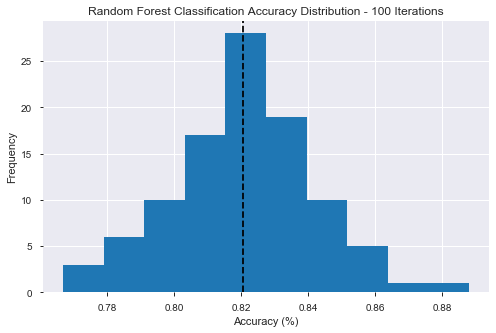

In [515]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.hist(acc_scores)
ax.axvline(x=np.mean(acc_scores), color='black', linestyle='--')
ax.set_xlabel('Accuracy (%)')
ax.set_ylabel('Frequency')
ax.set_title('Random Forest Classification Accuracy Distribution - 100 Iterations');

In [516]:
feat_imp = list(zip(rf.feature_importances_, df.columns))

In [517]:
sorted(feat_imp, reverse=True)

[(0.4423635574442061, 'sex_male'),
 (0.14030431151153208, 'Fare'),
 (0.11059424736255755, 'Age'),
 (0.09802248463959512, 'PassengerId'),
 (0.06797281820732284, 'class_3'),
 (0.04382307958087139, 'class_1'),
 (0.024621907406224042, 'SibSp'),
 (0.017502943762792916, 'Parch'),
 (0.015869495174983105, 'Emb_C'),
 (0.014329200567115558, 'Emb_S'),
 (0.01045667030037771, 'class_2'),
 (0.008637138794576497, 'Alone'),
 (0.005502145247845318, 'Emb_Q')]

## Make predictions on unlabeled data

Below I check the pandas profiling report to see if there are any issues

In [488]:
test.head()

PassengerId   Age  SibSp  Parch     Fare  Emb_C  Emb_Q  Emb_S  sex_male  \
891          892  34.5      0      0   7.8292      0      1      0         1   
892          893  47.0      1      0   7.0000      0      0      1         0   
893          894  62.0      0      0   9.6875      0      1      0         1   
894          895  27.0      0      0   8.6625      0      0      1         1   
895          896  22.0      1      1  12.2875      0      0      1         0   

     class_1  class_2  class_3  Alone  
891        0        0        1      1  
892        0        0        1      0  
893        0        1        0      1  
894        0        0        1      1  
895        0        0        1      0

In [489]:
pp.ProfileReport(test)

Now I can use the test dataset to predict on the unlabeled data.

In [490]:
final_clf = RandomForestClassifier(**best_rf_params)
final_clf.fit(X, y)
final_preds = final_clf.predict(test)

In [491]:
submission = pd.DataFrame([])

In [492]:
submission['PassengerId'] = test_index
submission['Survived'] = final_preds

In [493]:
submission.head()

PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         0

In [494]:
submission.to_csv('submission_6.csv')